In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

In [11]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
df.drop(columns ='id',inplace =True)

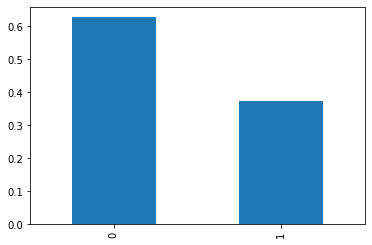

In [13]:
df['diagnosis'].value_counts(normalize =True).plot(kind ='bar')

In [14]:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [15]:
df.drop(columns ='Unnamed: 32',inplace =True)

In [16]:
df.shape

(569, 31)

In [18]:
#sns.pairplot(df,hue ='diagnosis')

In [19]:
y = df['diagnosis']
x = df.drop(columns ='diagnosis')


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

accuracy score on train 1.0
AxesSubplot(0.125,0.125;0.62x0.755)


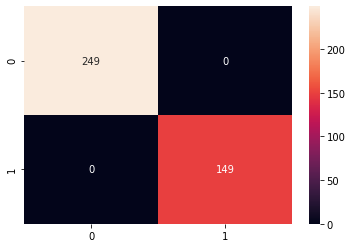

auc_roc_score train is  1.0
accuracy score on test 0.9707602339181286
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score_test is  0.9961052322163433


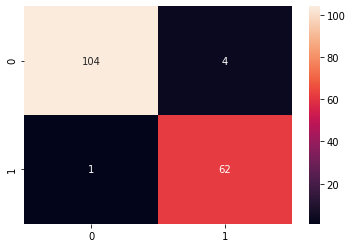

In [30]:
rfc = RandomForestClassifier()
model =rfc.fit(X_train,y_train)
ytrain_prob = model.predict_proba(X_train)[:,1]
ytrainpred = model.predict(X_train)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
plt.show()
print('auc_roc_score train is ',roc_auc_score(y_train,ytrain_prob))
ytest_prob = model.predict_proba(X_test)[:,1]
ytestpred = model.predict(X_test)
print('accuracy score on test',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score_test is ',roc_auc_score(y_test,ytest_prob))